# Ocean and Land Temperature Anomalies
**The Boyz are back**


---
**Team Members**


*   Saffian Asghar
*   Alexis Culpin
*   Romaric Sallustre
*   Emilio Espinosa S.



---


**Datasets**

* NOAA_URL = "https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/12/1850-2023/data.json"
* BERKLEY_URL = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Raw_TMAX_complete.txt"
* HAD_CRUT5_URL = "https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.csv"



---

**Features**
* The dataset is collected from NOAA, Berkeley Earth and CRUT5
* The chosen time period is from 1850 - Present.
* Some of the interesting columns are confidence limits in the dataset from CRUT 5.
* The dataset from Berkley Earth has a range of missing values from 2012 to 2023 in specific columns.
* The formats of the data includes csv, txt and json. Further data transformations will be updated sometime.

In [67]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
# Save URL into
NOAA_URL = "https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/12/1850-2023/data.json"
BERKLEY_URL = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Raw_TMAX_complete.txt"
HAD_CRUT5_URL = "https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.csv"


In [61]:
# Read Json file
df_noaa = pd.read_json(NOAA_URL)

# Dataframe drop unnecessary columns ...
df_noaa = (
    df_noaa
    .drop('description', axis=1)
    .loc[pd.to_numeric(df_noaa.index, errors='coerce').notna()]
)
# Set index as int
df_noaa.index = df_noaa.index.astype(int)
# Rename columns with specific format
df_noaa = df_noaa.rename(columns=lambda x: f"NOAAGlobalTemp ({df_noaa.index.min()} - {df_noaa.index.max()})")
df_noaa.head()

,NOAAGlobalTemp (1850 - 2023)
1850,-0.07
1851,-0.03
1852,-0.09
1853,-0.22
1854,0.01


In [62]:
# read second dataset
had_crut5_df = pd.read_csv(HAD_CRUT5_URL, parse_dates=['Time'])
# Group by year and calculate average per year.
had_crut5_df = (
    had_crut5_df
    .groupby(had_crut5_df['Time'].dt.year)['Anomaly (deg C)'].mean().reset_index()
    .set_index('Time')
)
# Set index as int
had_crut5_df.index = had_crut5_df.index.astype(int)
had_crut5_df.head()

,Anomaly (deg C)
Time,
1850,-0.417711
1851,-0.233350
1852,-0.229399
1853,-0.270354
1854,-0.291521


In [63]:
# Read third dataset
berkley_df = pd.read_csv(BERKLEY_URL, comment="%", delim_whitespace=True, names= ["year", "month", "anomaly", "yearAvgAnomaly", "5yearAvgAnomaly", "10yearAvgAnomaly", "20yearAvgAnomaly"])
# Group by year and calculate average per year.
berkley_df = (
    berkley_df
    .groupby(berkley_df['year'])['anomaly'].mean().reset_index()
    .set_index('year')
)
# berkley_df = berkley_df.assign(realTemp = berkley_df['anomaly'] + 14.40)
berkley_df.index = berkley_df.index.astype(int)
berkley_df

,anomaly
year,
1850,-1.141667
1851,-0.971583
1852,-1.007917
1853,-0.382333
1854,-0.170500
...,...
2019,1.199167
2020,1.391000
2021,1.160500


In [64]:
# Join the two datasets based on the common 'index' (year)
merged_df = (
    df_noaa
    .join(had_crut5_df.rename(columns={'Anomaly (deg C)': 'HadCRUT5_Anomaly'}), how='left')
    .join(berkley_df.rename(columns={'anomaly':'Berkley_anomaly'}), how='left')
)

# Rename the new column as per your specified format
merged_df = (
    merged_df
    .rename(columns={'HadCRUT5_Anomaly': f"HAD_CRUT5 ({had_crut5_df.index.min()} - {had_crut5_df.index.max()})"})
    .rename(columns={'Berkley_anomaly': f"BerkleyEarth ({berkley_df.index.min()} - {berkley_df.index.max()})"})
)

In [65]:
merged_df

,NOAAGlobalTemp (1850 - 2023),HAD_CRUT5 (1850 - 2023),BerkleyEarth (1850 - 2023)
1850,-0.07,-0.417711,-1.141667
1851,-0.03,-0.233350,-0.971583
1852,-0.09,-0.229399,-1.007917
1853,-0.22,-0.270354,-0.382333
1854,0.01,-0.291521,-0.170500
...,...,...,...
2019,1.10,0.891073,1.199167
2020,0.84,0.922921,1.391000
2021,0.87,0.761906,1.160500
2022,0.84,0.801305,1.205750


<Axes: title={'center': 'Global Temperature change'}>

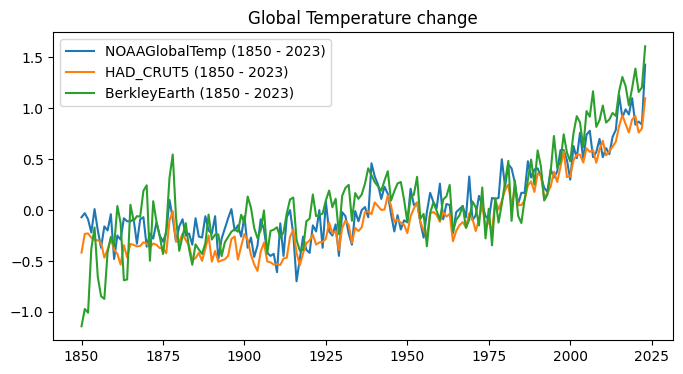

In [66]:
merged_df.plot(kind='line', figsize=(8, 4), title='Global Temperature change')

,month,anomaly,yearAvgAnomaly,5yearAvgAnomaly,10yearAvgAnomaly,20yearAvgAnomaly,realTemp
year,,,,,,,
1850,1,-1.956,-1.020,-0.985,-0.764,-0.614,12.444
1850,2,0.113,-0.984,-0.978,-0.767,-0.620,14.513
1850,3,-1.881,-1.031,-0.969,-0.771,-0.621,12.519
1850,4,-1.215,-1.080,-0.963,-0.767,-0.625,13.185
1850,5,-0.960,-1.248,-1.002,-0.753,-0.621,13.440
...,...,...,...,...,...,...,...
2023,7,1.564,NaN,NaN,NaN,NaN,15.964
2023,8,1.895,NaN,NaN,NaN,NaN,16.295
2023,9,2.058,NaN,NaN,NaN,NaN,16.458
